In [30]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import pandas as pd
import numpy as np
import random

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Supervised Learning

In [ ]:
data = load_iris()

iris = pd.DataFrame(data.data, columns=['SL', 'SW', 'PL', 'PW'])
iris['label'] = data.target
iris.head()

In [ ]:
data.target_names

In [ ]:
iris.shape

In [ ]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x='SL', y='PL', hue='label', palette='Set2', data=iris)

In [ ]:
model = RandomForestClassifier(random_state=0)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(iris[['SL','PL']], iris[['label']])

In [ ]:
model.fit(x_train, y_train)

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
accuracy_score(y_pred, y_test)

## Unsupervised Learning 

In [ ]:
data = load_iris()

iris = pd.DataFrame(data.data, columns=['SL', 'SW', 'PL', 'PW'])
iris.head()

In [ ]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x='SL', y='PL', palette='Set2', data=iris)

In [ ]:
model = NearestNeighbors(n_neighbors=2, algorithm='ball_tree')

In [ ]:
model.fit(iris[['SL','PL']])

In [ ]:
# model.predict

In [ ]:
grid = model.kneighbors_graph(iris[['SL','PL']]).toarray()

In [ ]:
grid.shape

## Reinforcement Learning

### Multi-Armed Bandit problem

In [44]:
np.random.seed(5)

In [45]:
n = 10
arms = np.random.rand(n)
eps = 0.1 # probability of exploration action

In [46]:
def reward(prob):
    reward = 0
    for i in range(10):
        if random.random() < prob:
            reward += 1
    
    return reward

In [47]:
# initialize memory array; has 1 row defaulted to random action index
# av = action-value
av = np.array([np.random.randint(0, (n+1)), 0]).reshape(1, 2)

In [48]:
# greedy method to select best arm based on memory array
def bestArm(a):
    bestArm = 0
    bestMean = 0
    for u in a:
        #calculate mean reward for each action
        avg = np.mean(a[np.where(a[:, 0] == u[0])][:,1])
        if bestMean < avg:
            bestMean = avg
            bestArm = u[0]
    
    return bestArm

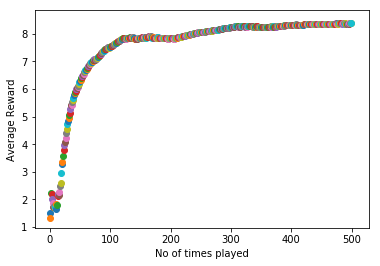

In [49]:
plt.xlabel('No of times played')
plt.ylabel('Average Reward')

for i in range(500):
    if random.random() > eps: # greedy exploitation action
        choice = bestArm(av)
        thisAV = np.array([[choice, reward(arms[choice])]])
        av = np.concatenate((av, thisAV), axis=0)
    else: # exploration action
        choice = np.where(arms == np.random.choice(arms))[0][0]
        thisAV = np.array([[choice, reward(arms[choice])]])
        av = np.concatenate((av, thisAV), axis=0)
    
    # calculate the mean reward
    runningMean = np.mean(av[:,1])
    plt.scatter(i, runningMean)